In [1]:
import scanpy as sc
import scIB
import pandas as pd
import numpy as np

In [2]:
adata = sc.read("/storage/groups/ml01/workspace/scIB/simulations_1_1/sim1_1_norm.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 12097 × 9979 
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'BatchFacBatch5', 'BatchFacBatch6', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'DEFacGroup5', 'DEFacGroup6', 'DEFacGroup7', 'mean', 'detected'
    layers: 'counts'

In [5]:
adata_scgen = scIB.ig.runScGen(adata, 'Batch', 'Group', model_path='./tmp')

In [6]:
adata_scgen

AnnData object with n_obs × n_vars = 12097 × 9979 
    obs: 'Batch', 'Cell', 'Discard', 'ExpLibSize', 'Group', 'detected', 'percent_top_100', 'percent_top_200', 'percent_top_50', 'percent_top_500', 'size_factors', 'sum', 'total'
    obsm: 'latent'

In [7]:
sc.pp.pca(adata_scgen, svd_solver='arpack')
sc.pp.neighbors(adata_scgen)
sc.tl.umap(adata_scgen)

/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics

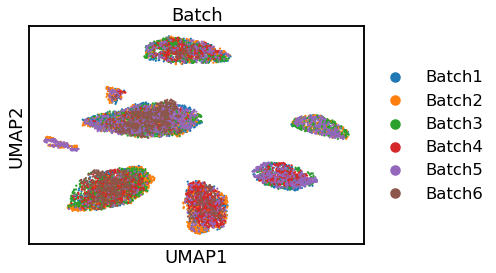

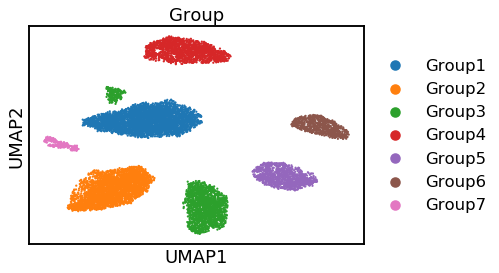

In [9]:
sc.pl.umap(adata_scgen, color='Batch', size=20)
sc.pl.umap(adata_scgen, color='Group', size=20)

# Test snakemake pipeline version

In [10]:
adata_scgen1 = sc.read("/storage/groups/ml01/workspace/scIB/simulations_1_1/integration/unscaled/full_feature/scgen.h5ad")
adata_scgen2 = sc.read("/storage/groups/ml01/workspace/scIB/simulations_1_1/integration/unscaled/hvg/scgen.h5ad")

In [11]:
sc.pp.pca(adata_scgen1, svd_solver='arpack')
sc.pp.neighbors(adata_scgen1)
sc.tl.umap(adata_scgen1)

/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


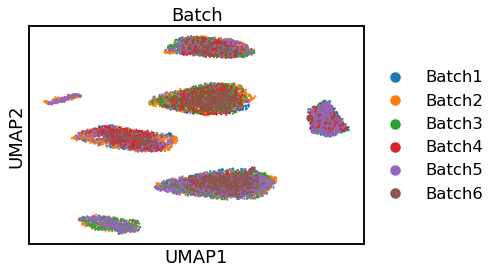

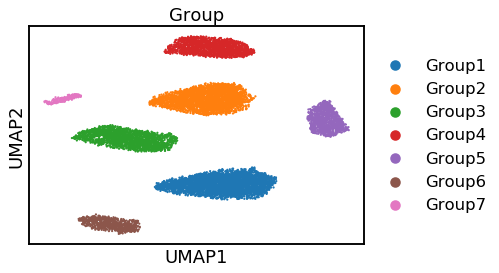

In [13]:
sc.pl.umap(adata_scgen1, color='Batch', size=20)
sc.pl.umap(adata_scgen1, color='Group', size=20)

In [12]:
sc.pp.pca(adata_scgen2, svd_solver='arpack')
sc.pp.neighbors(adata_scgen2)
sc.tl.umap(adata_scgen2)

/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/icb/daniel.strobl/miniconda3/envs/benchmarking_data_integration_dev/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


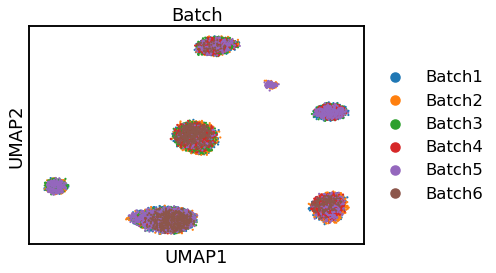

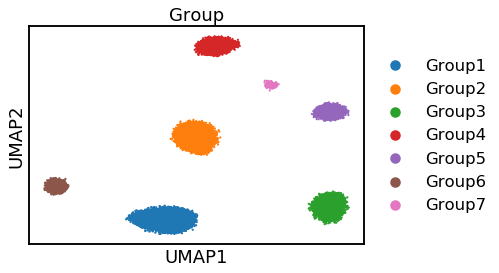

In [14]:
sc.pl.umap(adata_scgen2, color='Batch', size=20)
sc.pl.umap(adata_scgen2, color='Group', size=20)